**Analyse de la base de données Crime_Data_from_2020_to_Present**  \
Source : https://www.kaggle.com/datasets/ishajangir/crime-data

In [153]:
#IMPORTATION DES LIBRAIRIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [154]:
#IMPORTATION DE LA BASE DE DONNEES
data = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

**Nom des colonnes et explications**

**DR_NO** : Unique identifier for the crime report  \
**Date Rptd** : The date the crime was reported  \
**DATE OCC** : The actual date the crime occured  \
**TIME OCC** : The time the crime occurred, usually in 24 hour format  \
**AREA** : Numeric code representing the geographical area where the crime occurred  \
**AREA NAME** : Name of the geographical area  \
**Rpt Dist No** : Reporting district number for the incident  \
**Part 1-2** : Crime classification (e.g., Part 1 for serious crimes, Part 2 for less serious crimes)  \
**Crm Cd** : Numeric code representing the type of crime  \
**Crm Cd Desc** : Description of the crime type  \
**Mocodes** : Modus operandi codes, describing the method used in the crime  \
**Vict Age** : Age of the victim  \
**Vict Sex** : Gender of the victim (e.g., Male, Female, Unknown)  \
**Vict Descent** : Ethnicity or descent of the victim  \
**Premis Cd** : Numeric code for the type of premises where the crime occurred  \
**Premis Desc** : Description of the type of premises (e.g., residence, vehicle, commercial)  \
**Weapon Used Cd** : Numeric code for the weapon used in the crime, if applicable  \
**Weapon Desc** : Description of the weapon used  \
**Status** : Status code of the crime case (e.g., Open, Solved)  \
**Status Desc** : Description of the case status  \
**Crm Cd 1** : Additional crime codes, if the incident involved multiple offenses  \
**Crm Cd 2** : Additional crime codes, if the incident involved multiple offenses  \
**Crm Cd 3** : Additional crime codes, if the incident involved multiple offenses  \
**Crm Cd 4** : Additional crime codes, if the incident involved multiple offenses  \
**LOCATION** : Text description of the crime location  \
**Cross Street** : Nearby cross street for the crime location  \
**LAT** : Latitude of the crime location  \
**LON** : Longitude of the crime location  \

In [155]:
#Vérification des données manquantes
print(data.isnull().sum())

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151567
Vict Age                0
Vict Sex           144592
Vict Descent       144604
Premis Cd              16
Premis Desc           588
Weapon Used Cd     676308
Weapon Desc        676308
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           934330
Crm Cd 3          1001133
Crm Cd 4          1003384
LOCATION                0
Cross Street       849335
LAT                     0
LON                     0
dtype: int64


**ANALYSE EXPLORATOIRE DES DONNEES**

In [156]:
#Affiche les données de la base de données
print(data)

             DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0        190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130   
1        200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800   
2        200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700   
3        200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037   
4        200412582  09/09/2020 12:00:00 AM  09/09/2020 12:00:00 AM       630   
...            ...                     ...                     ...       ...   
1003443  240710284  07/24/2024 12:00:00 AM  07/23/2024 12:00:00 AM      1400   
1003444  240104953  01/15/2024 12:00:00 AM  01/15/2024 12:00:00 AM       100   
1003445  240410786  10/14/2024 12:00:00 AM  10/11/2024 12:00:00 AM      2330   
1003446  240309674  04/24/2024 12:00:00 AM  04/24/2024 12:00:00 AM      1500   
1003447  240910892  08/13/2024 12:00:00 AM  08/12/2024 12:00:00 AM      2300   

         AREA   AREA NAME  Rpt Dist No 

In [157]:
#Recherche des doublons
duplicates = data.duplicated()
print(duplicates.sum())

0


La base de données ne contient aucune ligne dupliquée.

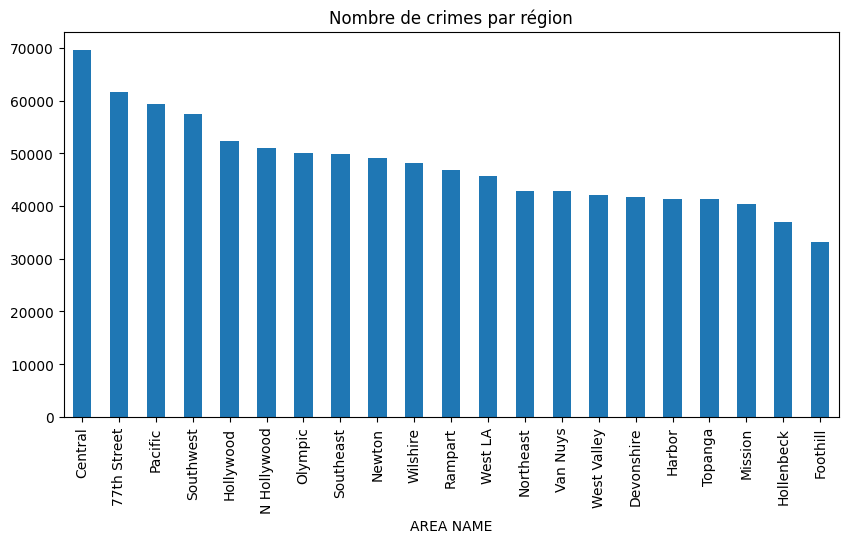

In [158]:
plt.figure(figsize=(10,5))
data['AREA NAME'].value_counts().plot(kind='bar')
plt.title('Nombre de crimes par région')
plt.show()

Aucune région géographique ne se distingue réellement des autres. Les différences entre les régions peuvent s'expliquer par leurs populations respectives. Malheureusement, nous ne disposons pas de ces données dans cette base de données, ce qui nous empêche de réaliser une comparaison ou un test de corrélation entre la population et le nombre de crimes enregistrés.

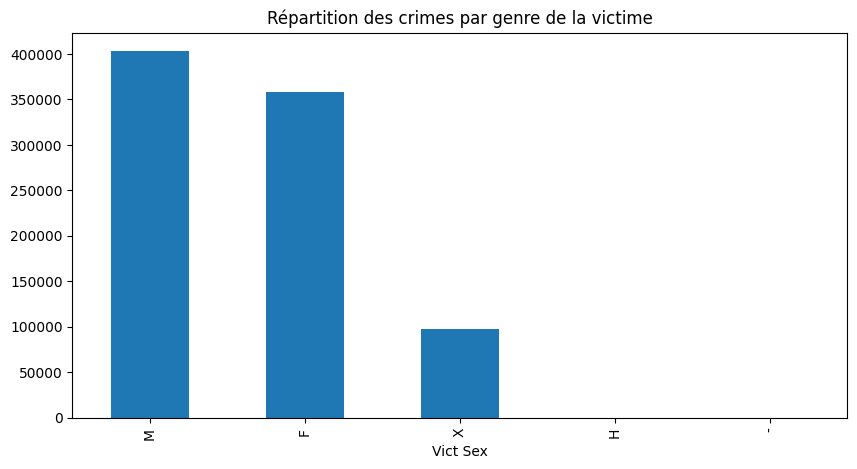

In [159]:
plt.figure(figsize=(10,5))
data['Vict Sex'].value_counts().plot(kind='bar')
plt.title('Répartition des crimes par genre de la victime')
plt.show()

La variable 'Vict Sex' contient **144 592 valeurs manquantes**, ce qui peut affecter l'exactitude du graphique. Néanmoins, celui-ci permet d'avoir une idée générale de la distribution du nombre de victimes par genre.

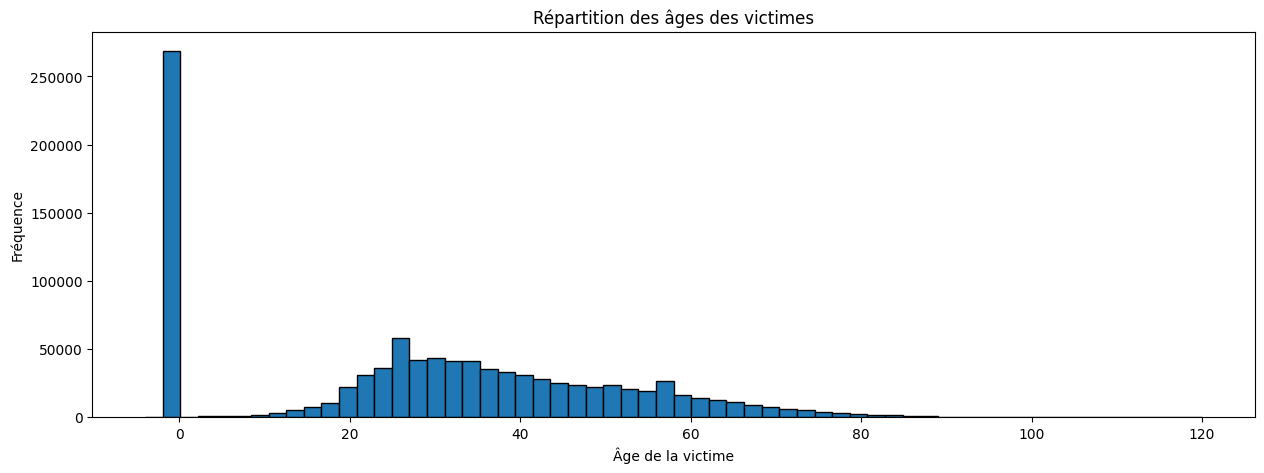

In [160]:
plt.figure(figsize=(15, 5))
plt.hist(data['Vict Age'], bins=60, edgecolor='black')
plt.title('Répartition des âges des victimes')
plt.xlabel('Âge de la victime')
plt.ylabel('Fréquence')
plt.show()

On remarque qu'il y a une concentration du nombre de victimes dont l'age est visiblement inférieur à un an. Cela est préoccupant ! Une concentration de victimes si jeunes semble anormale.

In [161]:
#Calcul de l'age moyen des victimes
print('Age moyen des victimes :', data['Vict Age'].mean())

Age moyen des victimes : 28.913324855896867


In [162]:
#Age médiande des victimes
print('Age médian des victimes :', data['Vict Age'].median())

Age médian des victimes : 30.0


In [163]:
#Age maximal des victimes
print('Age maximal des victimes :', data['Vict Age'].max())

Age maximal des victimes : 120


In [164]:
#Age minimal des victimes
print('Age minimal des victimes :', data['Vict Age'].min())

Age minimal des victimes : -4


L'âge moyen des victimes est de **28-29 ans**, tandis que l'âge médian est de **30 ans**.  \
On peut observer sur la représentation graphique que les données ne sont pas symétriques. La proximité entre l'âge médian et l'âge moyen s'explique par le nombre élevé de crimes commis sur des victimes de moins d'un an, ce qui constitue des valeurs extrêmes.

Il serait intéressant d'analyser les catégories de crimes dont sont victimes les enfants de moins d'un an.


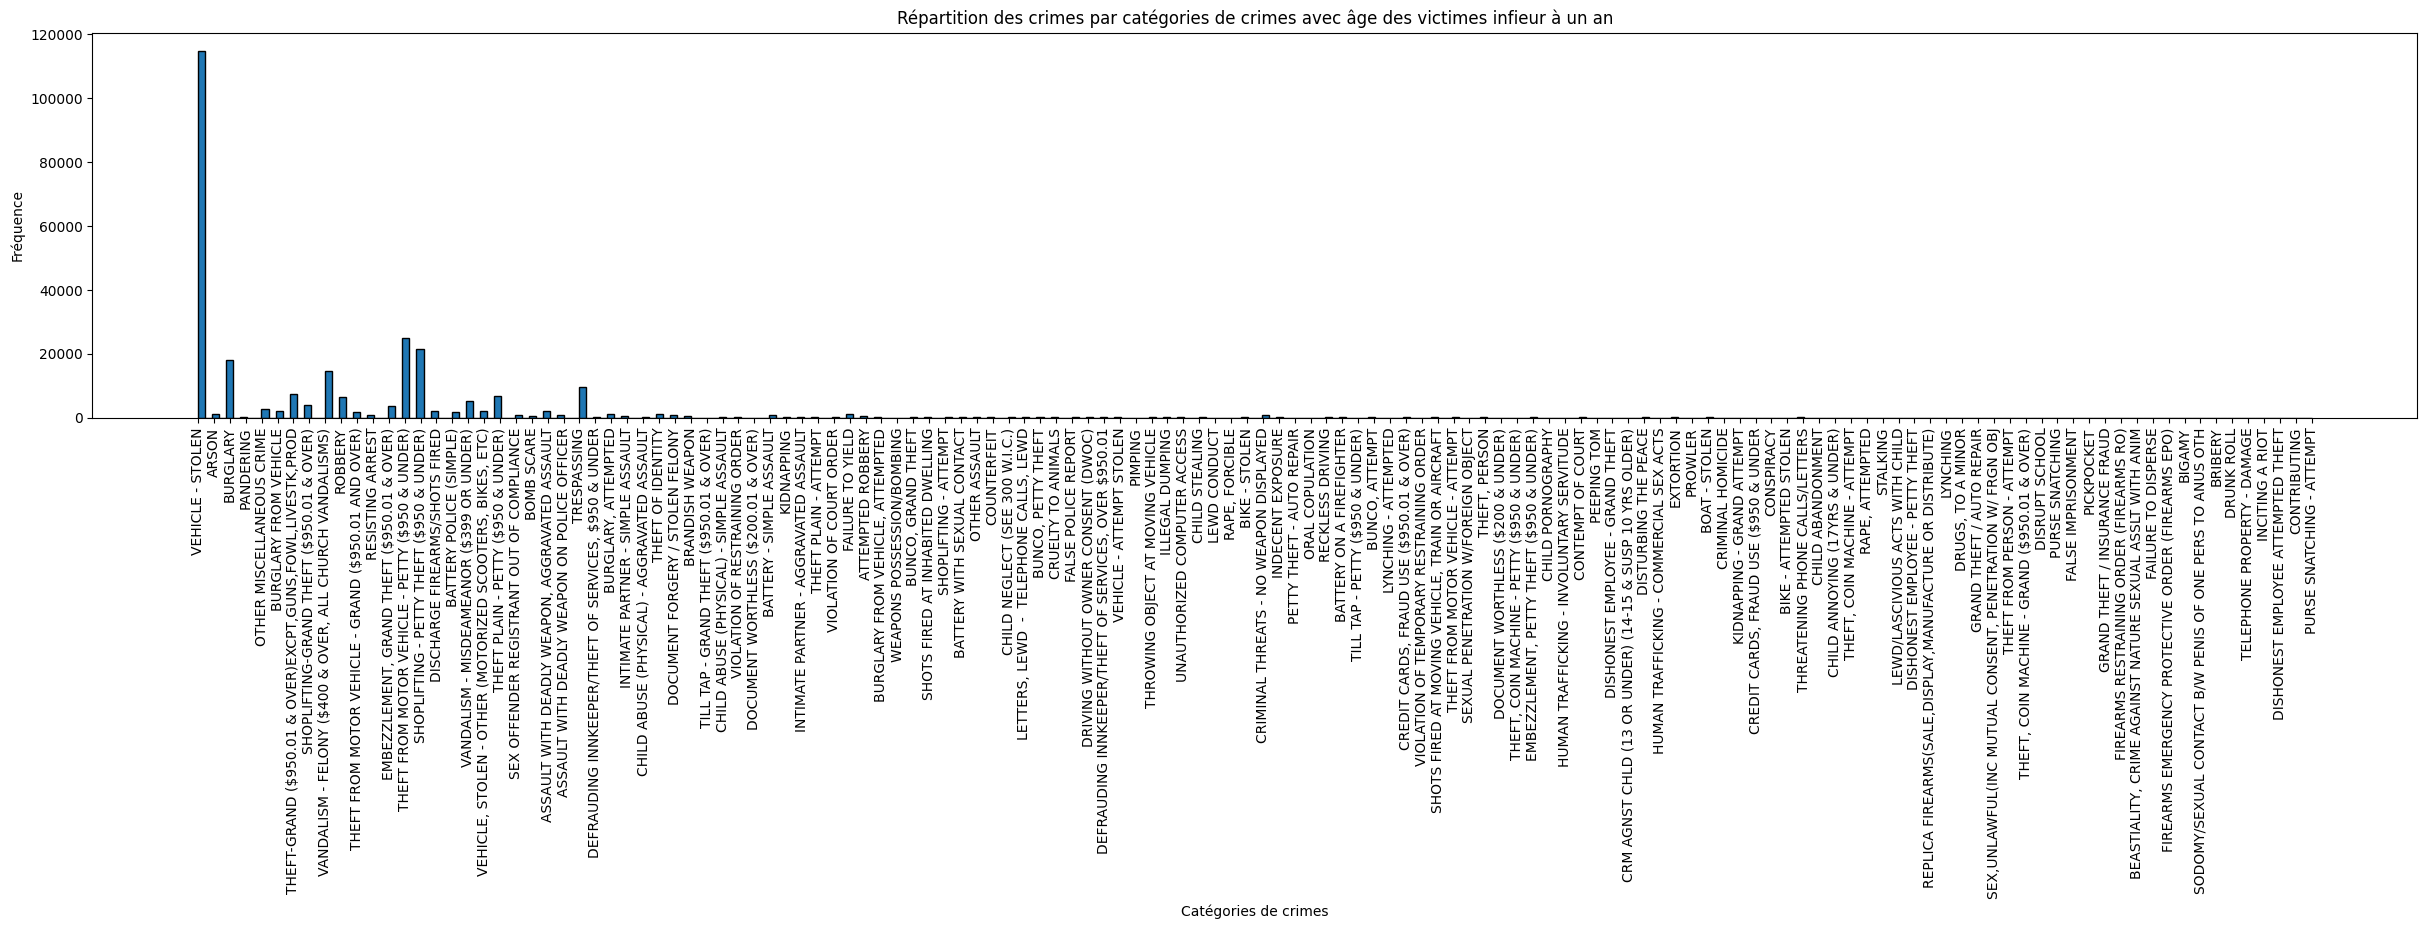

In [165]:
#Répartition des crimes par catégorie de crime avec age des victimes inférieur à un an
plt.figure(figsize=(30, 5))
plt.hist(data[data['Vict Age'] < 1]['Crm Cd Desc'], bins=300, edgecolor='black')
plt.title('Répartition des crimes par catégories de crimes avec âge des victimes infieur à un an')
plt.xlabel('Catégories de crimes')
plt.ylabel('Fréquence')
plt.xticks(rotation=90)  # Rotation des étiquettes de l'axe des x
plt.show()

In [166]:
#Pourcentage de crimes commis sur les enfants de moin de 1 an par rapport à l'ensemble des crimes
print('Pourcentage de crimes commis sur les enfants de moins de 1 an :', len(data[data['Vict Age'] < 1]) / len(data) * 100)

Pourcentage de crimes commis sur les enfants de moins de 1 an : 26.813148264783027


Il est préoccupant de constater une sureprésentation des enfants de moins d'un an parmi les victimes de la catégorie de crimes 'VEHICLE - STOLEN'. Ils représentent presque 27% du nombre total de victimes de cette catégorie. Cela soulève des questions importantes sur les circonstances dans lesquelles ces crimes se produisent et sur les mesures de protection des enfants dans de tels contextes. Il pourrait être utile d'examiner plus en détail les conditions spécifiques de ces incidents pour comprendre comment mieux protéger cette population vulnérable.

C:\Users\saeru\AppData\Local\Temp\ipykernel_18416\1131048969.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])


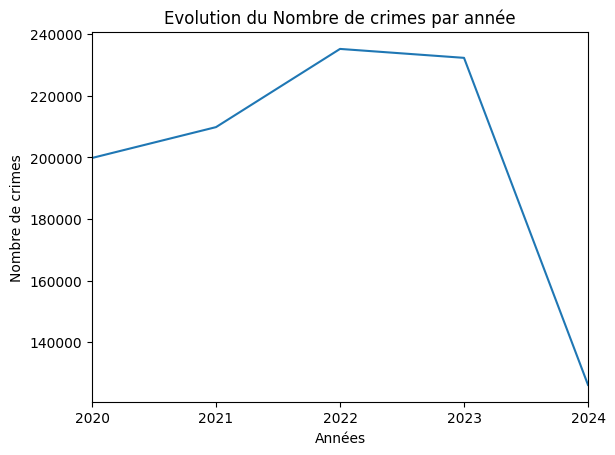

In [167]:
# Ensure 'DATE OCC' is in datetime format
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

# Set 'DATE OCC' as the index
data.set_index('DATE OCC', inplace=True)

# Resample the data by year and plot
crimes_par_an = data.resample('YE').size()
crimes_par_an.plot()
plt.title('Evolution du Nombre de crimes par année')
plt.xlabel('Années')
plt.ylabel('Nombre de crimes')
plt.show()

Le nombre de crimes enregistrés a augmenté considérablement entre 2020 et 2022, avant de connaître une légère baisse entre 2022 et 2023, puis une diminution substantielle en 2024. La date du dernier crime enregistré étant le 21/12/2024, cette diminution ne semble pas être due à un manque de données pour l'année 2024. Il serait intéressant d'examiner les raisons de cette baisse marquée dans le nombre de crimes enregistrés. Si des mesures anti-criminelles ont été mises en place, elles semblent fonctionner de manière efficace.

C:\Users\saeru\AppData\Local\Temp\ipykernel_18416\428893029.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.resample('M').size().plot()


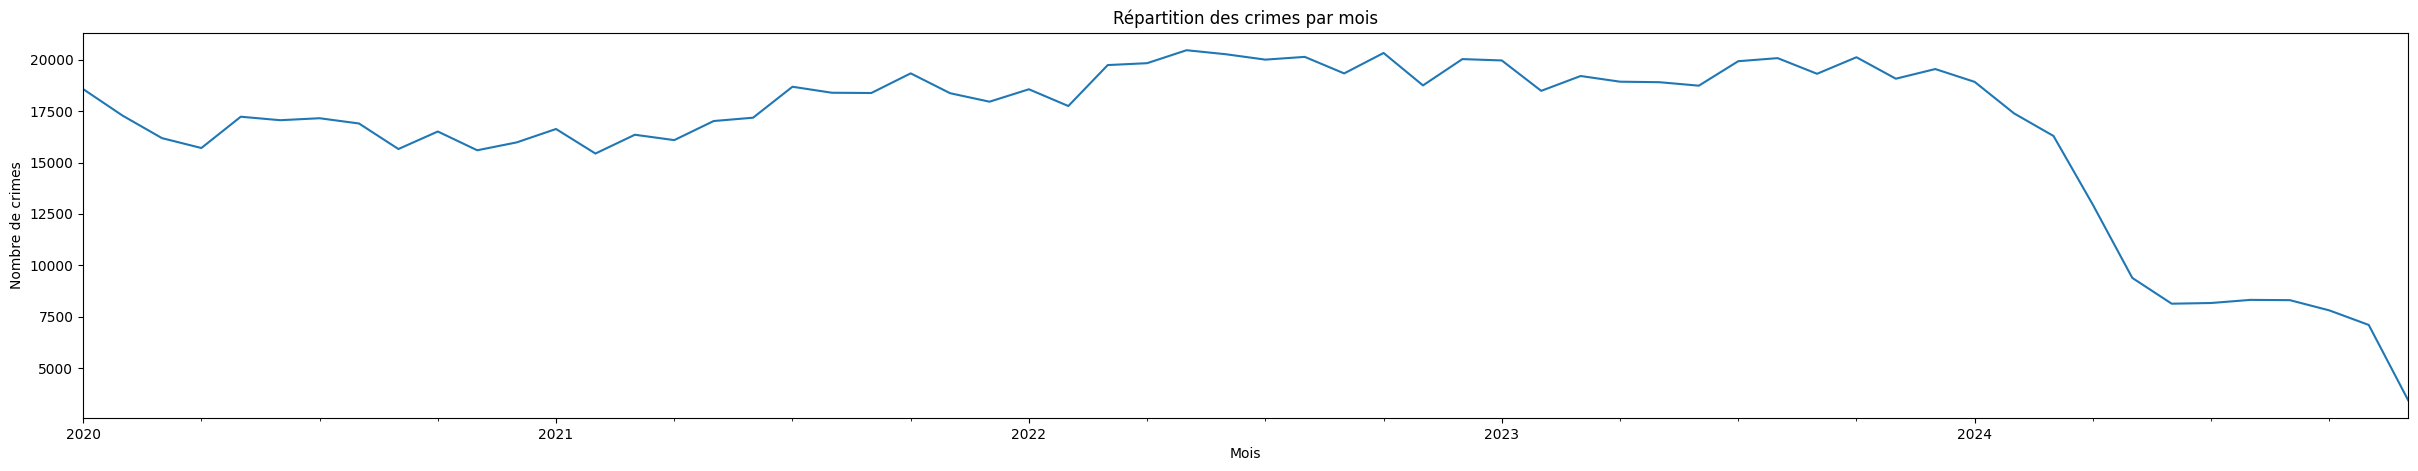

In [168]:
#regroupement des crimes par mois
plt.figure(figsize=(30,5))
data.resample('M').size().plot()
plt.title('Répartition des crimes par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de crimes')
plt.show()

Ce graphique présente de manière plus détaillée le nombre de crimes enregistrés chaque année, avec un détail sur les mois. On remarque qu'aucun mois spécifique ne se distingue vraiment au cours de l'année. Cependant, nous analyserons cela plus en profondeur avec la matrice des corrélations. Cette analyse nous permettra de mieux comprendre les relations entre les différentes variables et le nombre de crimes au fil du temps.

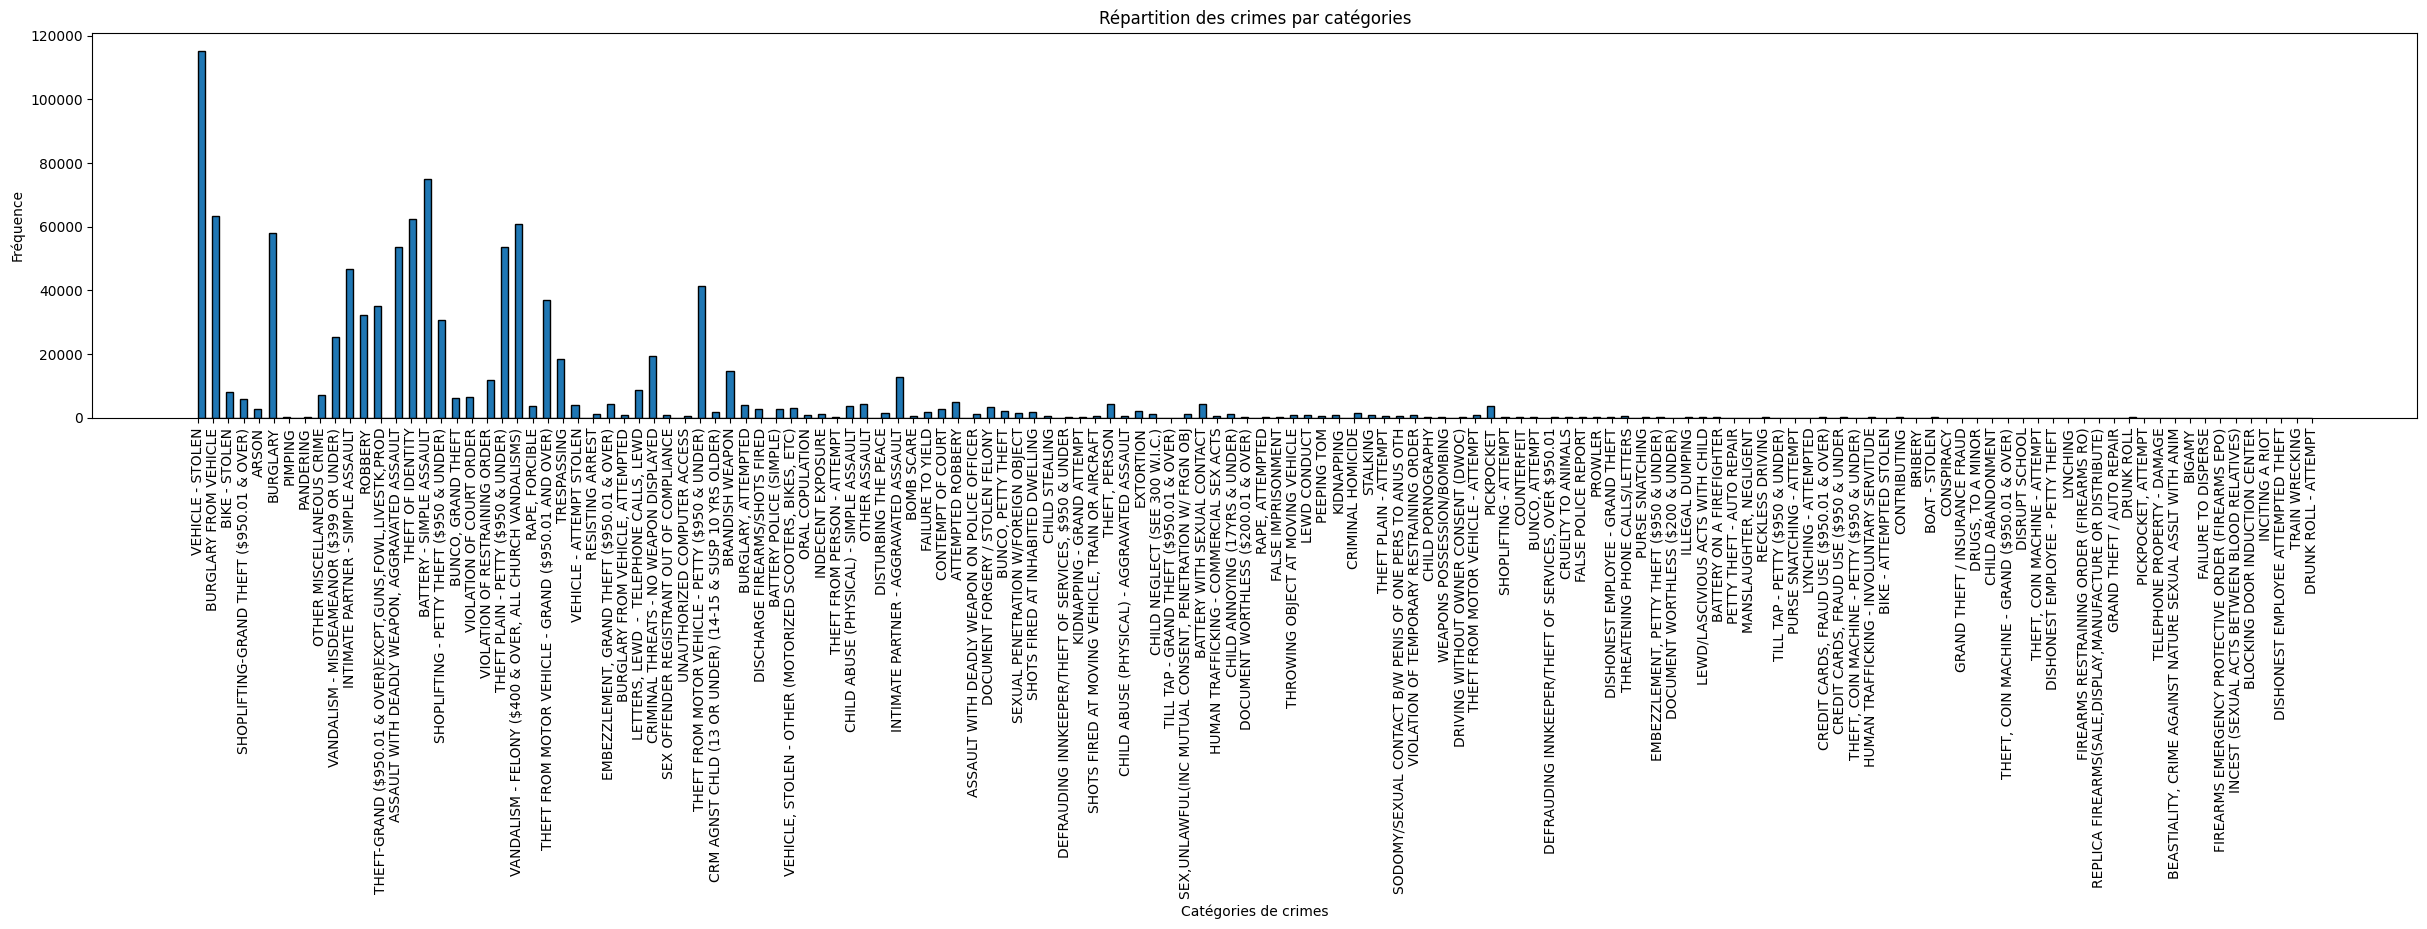

In [169]:
#Répartition des crimes par catégories
plt.figure(figsize=(30, 5))
plt.hist(data['Crm Cd Desc'], bins=300, edgecolor='black')
plt.title('Répartition des crimes par catégories')
plt.xlabel('Catégories de crimes')
plt.ylabel('Fréquence')
plt.xticks(rotation=90)  # Rotation des étiquettes de l'axe des x
plt.show()

In [170]:
#Pourcentage de crimes de la catégorie 'VEHICLE - STOLEN' par rapport à l'ensemble des crimes
print('Pourcentage de crimes de la catégorie "VEHICLE - STOLEN" :', len(data[data['Crm Cd Desc'] == 'VEHICLE - STOLEN']) / len(data) * 100)

Pourcentage de crimes de la catégorie "VEHICLE - STOLEN" : 11.479020337875006


Les crimes liés à la catégorie "VEHICLE - STOLEN"(VOL DE VÉHICULE) constituent la majorité des infractions enregistrées entre 2020 et 2024, représentant 11 % de l'ensemble des crimes répertoriés.

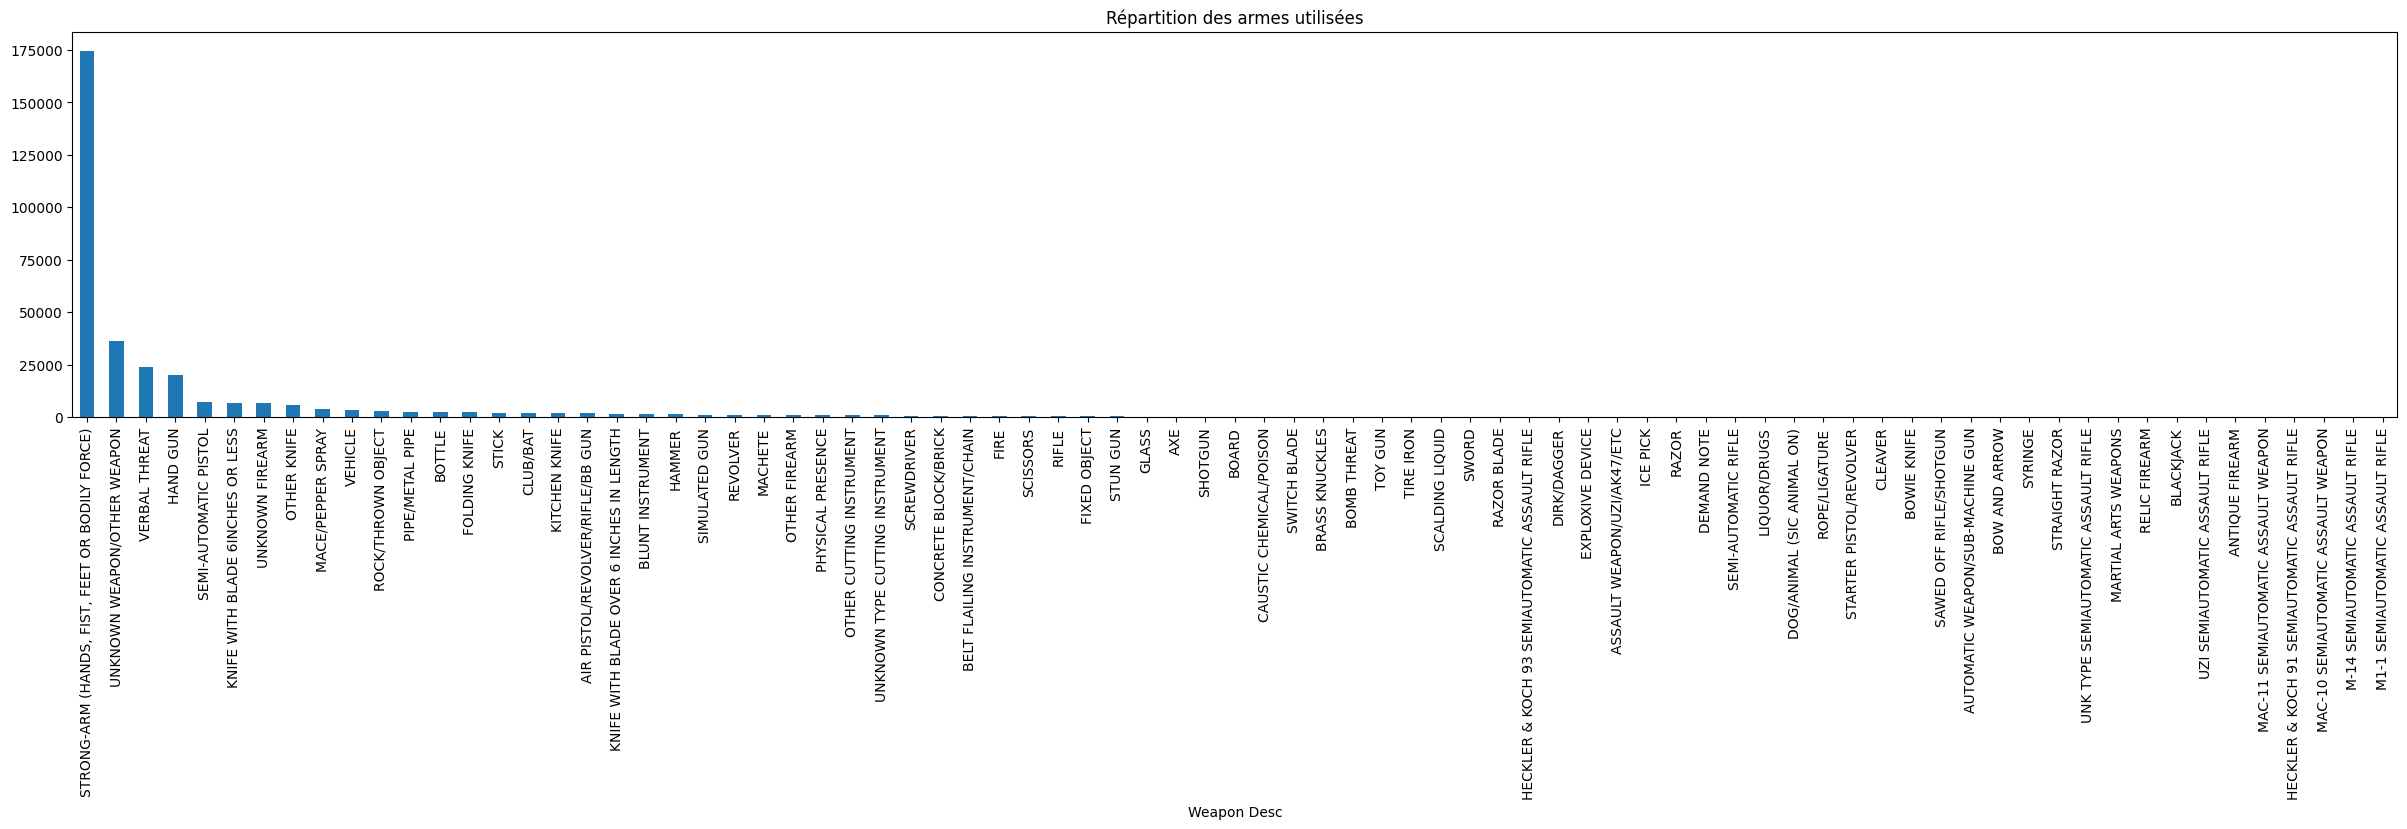

In [171]:
#Affiche la distribution des armes utilisées dans les crimes commis
plt.figure(figsize=(30,5))
data['Weapon Desc'].value_counts().plot(kind='bar')
plt.title('Répartition des armes utilisées')
plt.show()

La variable "Weapon Desc", qui correspond à la description des armes utilisées, présente **676 308 valeurs manquantes**. Cependant, on observe que la majorité des crimes ont été commis à mains nues (mains, pieds ou force physique). Ces données doivent néanmoins être interprétées avec prudence. Il est possible que dans de nombreux cas, les armes du crime n'aient simplement pas été retrouvées et que les circonstances des crimes ne permettent pas de deviner ou de déterminer quelle arme a pu être utilisée. Cela expliquerait le manque de données.

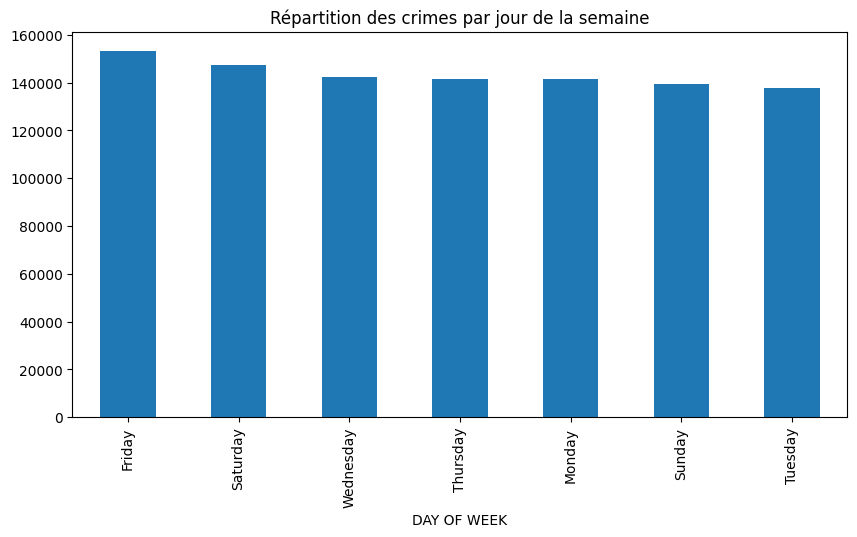

In [172]:
# Add a new column 'DAY OF WEEK' to the dataframe
data['DAY OF WEEK'] = data.index.day_name()

#Répartition des crimes par jour de la semaine
plt.figure(figsize=(10,5))
data['DAY OF WEEK'].value_counts().plot(kind='bar')
plt.title('Répartition des crimes par jour de la semaine')
plt.show()

Il est intéressant de noter que, bien qu'aucun jour de la semaine ne se distingue de manière significative des autres, le vendredi semble tout de même regrouper une proportion notable de crimes enregistrés. Cela pourrait suggérer des tendances spécifiques aux comportements criminels en fin de semaine. Cependant, il serait prudent d'analyser d'autres variables et contextes pour obtenir une image plus complète et éviter les conclusions hâtives.

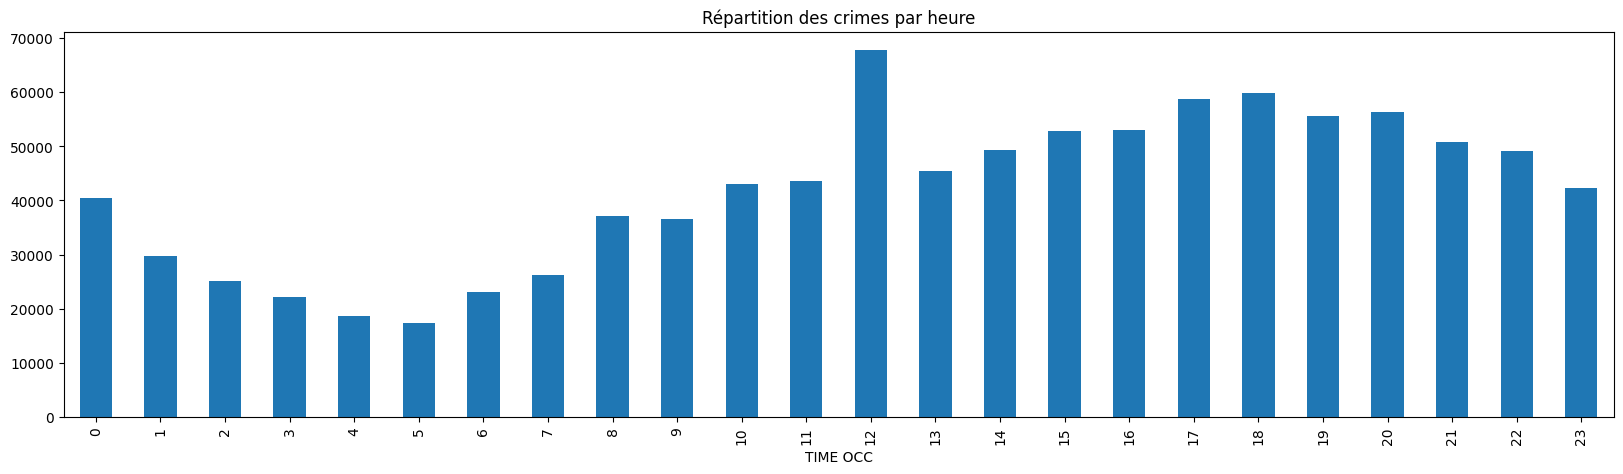

In [173]:
#Répartition des crimes par heure
# Convert 'TIME OCC' from "HHMM" to "HH:MM" format
data['TIME OCC'] = data['TIME OCC'].apply(lambda x: f"{str(x).zfill(4)[:2]}:{str(x).zfill(4)[2:]}")
# Regrouper les crimes par heure
data['TIME OCC'] = pd.to_datetime(data['TIME OCC'], format='%H:%M').dt.hour
plt.figure(figsize=(20,5))
data['TIME OCC'].value_counts().sort_index().plot(kind='bar')
plt.title('Répartition des crimes par heure')
plt.show()

**Euuuhhh des crimes à midi en pleine journée ?**  \
Il est surprenant de voir que la majorité des crimes on été commis en pleine journée. \
Est-ce que l'heure, la minute ou encore la seconde et le jour de la semaine à réelement un impact sur la probabilité d'être exposé à un crime ? Ou c'est juste le fruit du hasard ?  \
Il serait intéressant d'examiner les facteurs qui peuvent influer sur le moment où les crimes ont été commis.

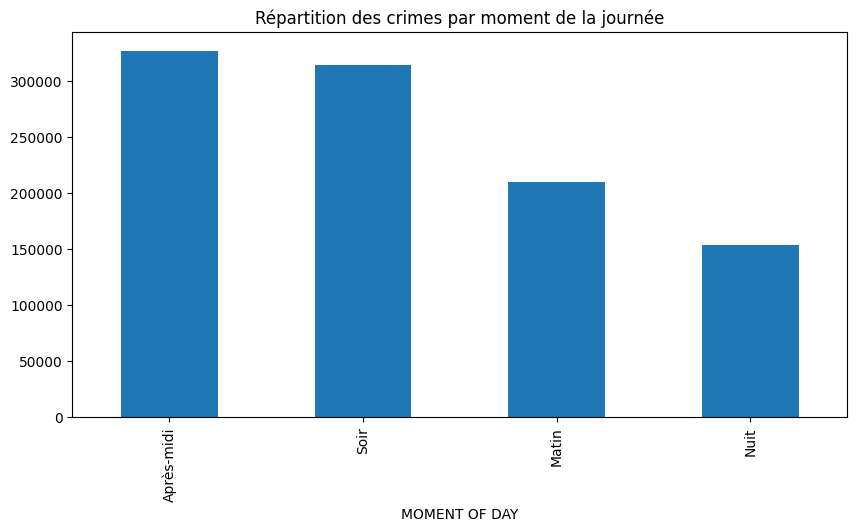

In [174]:
#regroupement les crimes par moment de la journée (matin, après-midi, soir, nuit) et affichage des crimes par moment de la journée
data['MOMENT OF DAY'] = pd.cut(data['TIME OCC'], bins=[0, 6, 12, 18, 24], labels=['Nuit', 'Matin', 'Après-midi', 'Soir'], right=False)
plt.figure(figsize=(10,5))
data['MOMENT OF DAY'].value_counts().plot(kind='bar')
plt.title('Répartition des crimes par moment de la journée')
plt.show()

C:\Users\saeru\AppData\Local\Temp\ipykernel_18416\1575717186.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  probabilite = data.groupby(['DAY OF WEEK', 'MOMENT OF DAY']).size() / len(data)


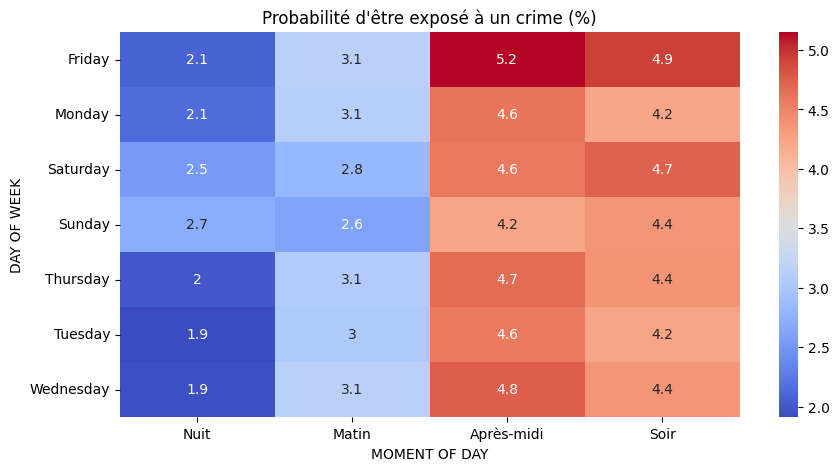

In [175]:
#Probabilité d'etre exposé à un crime en fonction du moment de la journée et du jour de la semaine
probabilite = data.groupby(['DAY OF WEEK', 'MOMENT OF DAY']).size() / len(data)
probabilite = probabilite.reset_index(name='PROBABILITE')
probabilite['PROBABILITE'] = probabilite['PROBABILITE'] * 100
probabilite['PROBABILITE'] = probabilite['PROBABILITE'].round(2)
probabilite = probabilite.pivot(index='DAY OF WEEK', columns='MOMENT OF DAY', values='PROBABILITE')
plt.figure(figsize=(10,5))
sns.heatmap(probabilite, annot=True, cmap='coolwarm')
plt.title('Probabilité d\'être exposé à un crime (%)')
plt.show()

L'après-midi et le soir semblent être les périodes les plus dangereuses de la journée. Et il faudrait peut-être faire un peu plus attention les vendredi :)


C:\Users\saeru\AppData\Local\Temp\ipykernel_18416\3719784737.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['AREA NAME', 'MOMENT OF DAY']).size().unstack().plot(kind='bar')


<Figure size 1500x700 with 0 Axes>

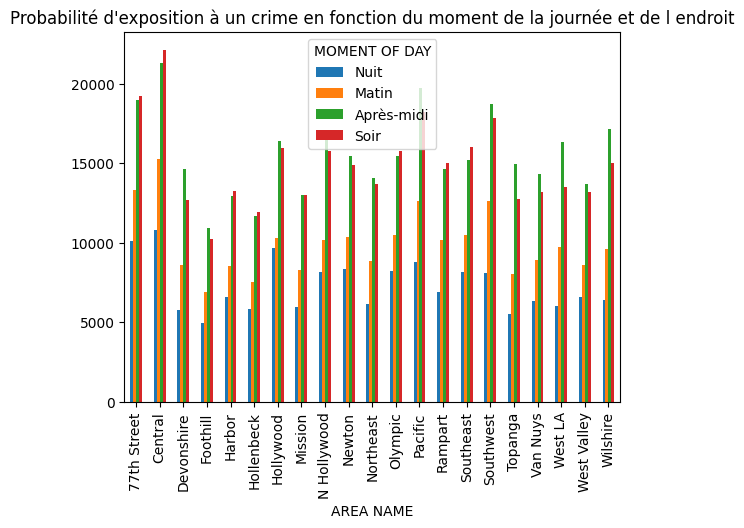

In [176]:
#Probabilité d'exposition à un crime en fonction de l'endroit et le moment de la journée
plt.figure(figsize=(15,7))
data.groupby(['AREA NAME', 'MOMENT OF DAY']).size().unstack().plot(kind='bar')
plt.title('Probabilité d\'exposition à un crime en fonction du moment de la journée et de l endroit')
plt.show()

On remarque que la probabilité d'être exposé à un crime varie considérablement d'une région à une autre et que la nuit et le matin restent les momemts les plus sûrs de la journée. Celà peut être du à plusieurs facteurs spécifiques à chaque région comme la démographie, l'urbanisation, les politiques locales, la culture, l'économie etc...